In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

pd.set_option('max_columns', 200)
%matplotlib inline

In [34]:
# Reading a CSV file into a Pandas DataFrame
#Loading the first 10 entries of the dataset

df = pd.read_csv('HR_comma_sep.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
#Checking the data types for all columns

df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [4]:
#Checking for null values

df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

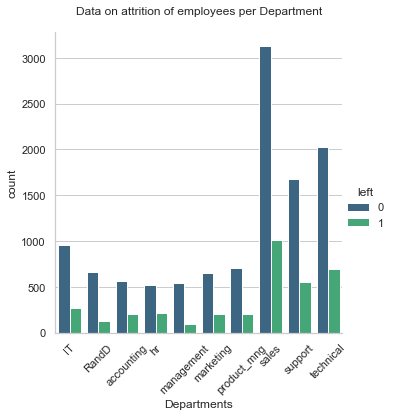

In [5]:
# Grouping DataFrame by 'sales' and 'left', and aggregating the 'satisfaction_level' column
attrn_data = df.groupby(['sales', 'left'])['satisfaction_level']\
.agg(['count']).reset_index()

# Setting Seaborn theme to whitegrid
sb.set_theme(style='whitegrid')

# Creating a categorical plot (bar plot) using Seaborn
sb.catplot(kind='bar', data=attrn_data, x='sales', y='count', hue='left', 
          palette = 'viridis')

# Adding labels and title to the plot
plt.xlabel('Departments')
plt.title('Data on attrition of employees per Department\n')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45);

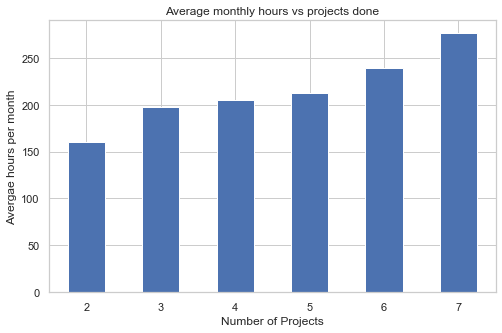

In [6]:
# Grouping DataFrame by 'number_project' and aggregating 'average_montly_hours'
# Creating a bar plot with the mean of 'average_montly_hours' for each 'number_project'
ax = df.groupby('number_project')['average_montly_hours'] \
.agg(['mean', 'count'])['mean']\
.plot(kind='bar', figsize = (8, 5), title = 'Average monthly hours vs projects done');

# Adding labels to the x and y axes
ax.set_xlabel('Number of Projects')
ax.set_ylabel('Avergae hours per month')
plt.xticks(rotation=0);

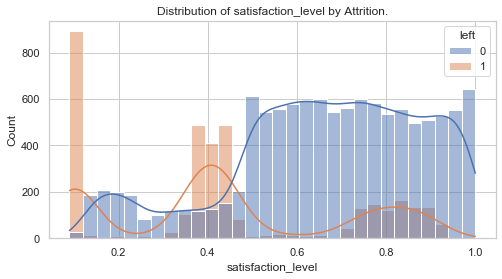

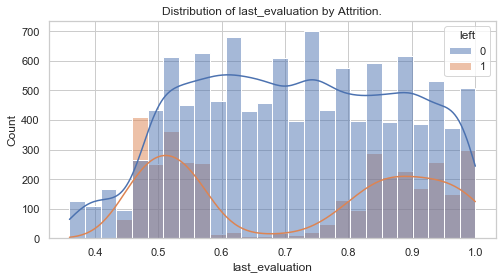

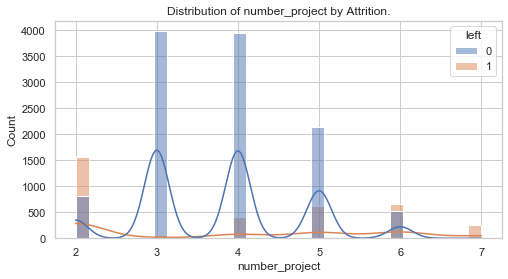

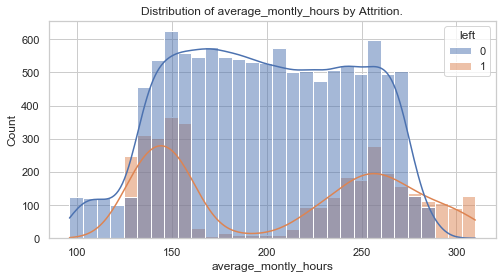

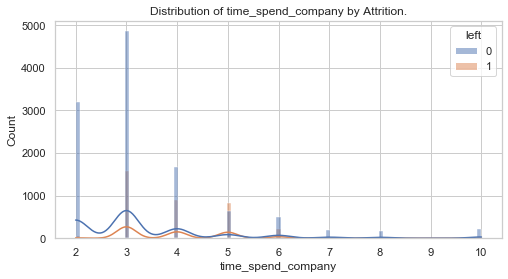

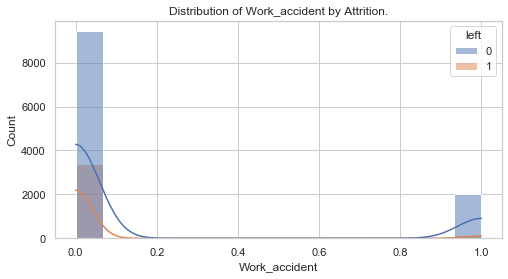

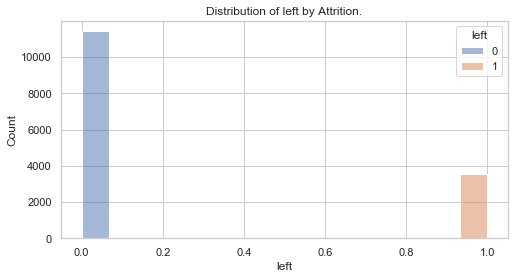

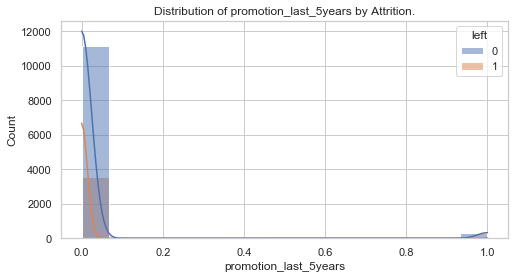

In [7]:
# Getting the numerical columns from DataFrame statistics
numerical_cols = df.describe().columns

# Looping through numerical columns for visualization
for col in numerical_cols:
    
    # Creating a figure and axis with specified size
    plt.figure(figsize=(8, 4))
    
    # Creating a histogram with kernel density estimation (kde)
    sb.histplot(data = df, x = col, hue = 'left', kde = True)
    
    # Adding title to the plot
    plt.title(f'Distribution of {col} by Attrition.')
    
    # Displaying the plot
    plt.show()

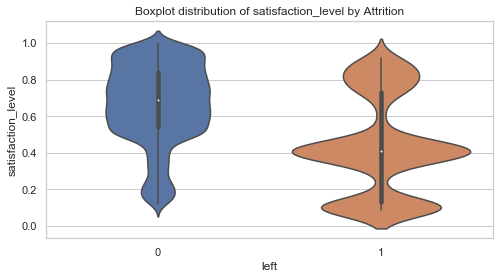

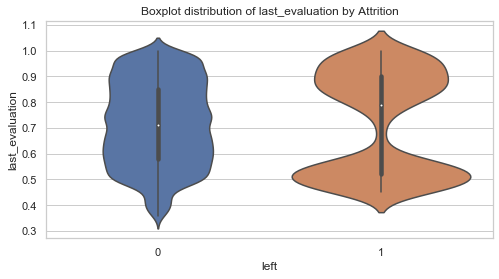

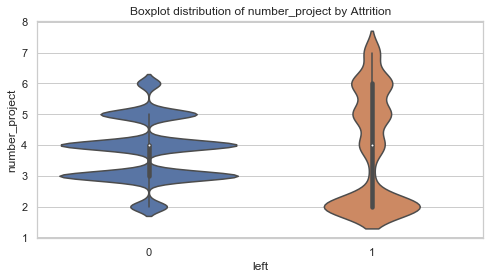

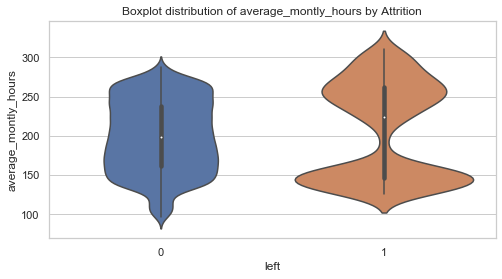

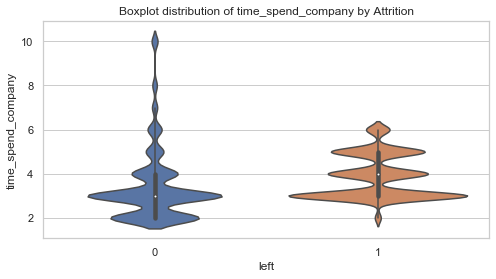

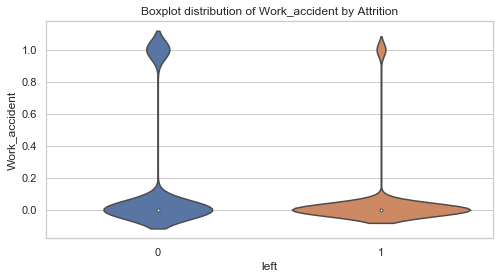

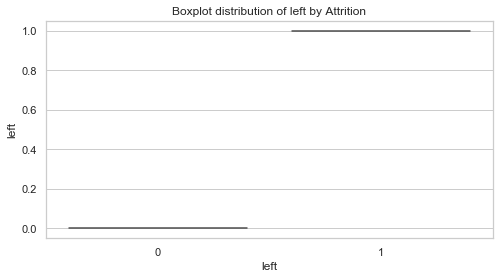

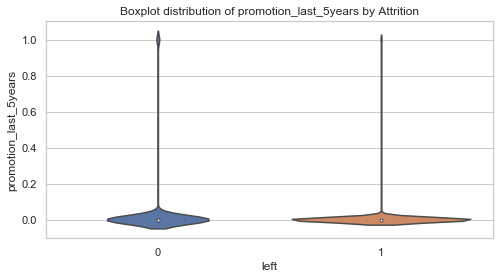

In [8]:
# Looping through numerical columns for visualization
for col in numerical_cols:
    # Creating a figure and axis with specified size
    plt.figure(figsize=(8, 4))
    
    # Creating a violin plot for each 'left' category
    sb.violinplot(data = df, x = 'left', y = col)
    
    # Adding title to the plot
    plt.title(f'Boxplot distribution of {col} by Attrition')
    plt.show()

In [9]:
trial = df.groupby(['sales', 'number_project'])['satisfaction_level']\
.agg(['count']).pivot_table(index='sales', columns='number_project', values='count')

trial

number_project,2,3,4,5,6,7
sales,,,,,,
IT,182,347,347,236,95,20
RandD,87,247,225,163,52,13
accounting,126,199,221,140,66,15
hr,140,216,222,94,54,13
management,79,171,207,118,42,13
marketing,154,247,251,140,51,15
product_mng,149,235,262,169,71,16
sales,717,1090,1190,755,321,67
support,350,596,650,433,174,26


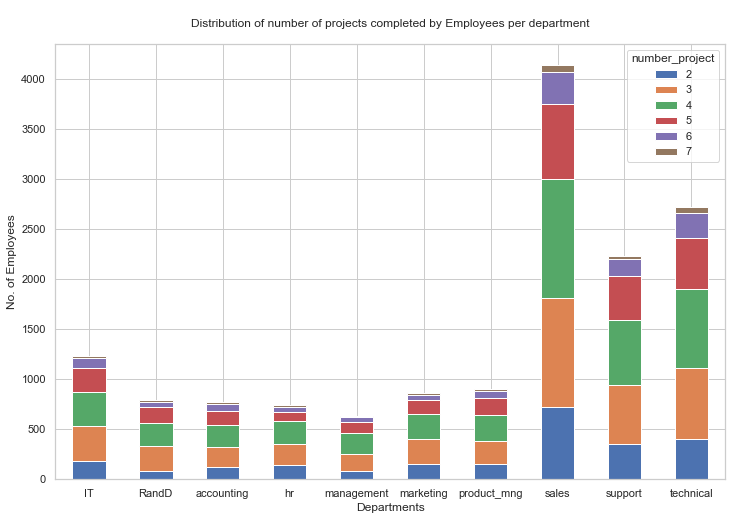

In [32]:
# Creating a stacked bar plot for the 'trial' DataFrame
trial.plot(kind='bar', stacked=True, figsize=(12, 8))

# Adding title and labels to the plot
plt.title('\nDistribution of number of projects completed by Employees per department\n')
plt.xlabel('Departments')
plt.ylabel('No. of Employees')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=0);

<h1> Insights </h1>
<h2> Average monthly hours </h2>

The graph shows the relationship between the avearge hours completed by employees as a reflection on the number of projects completed. Workers who average 12 hr working days have the highest number of preojects completed compared to those that average lesss that 8 hours a day. Two possible insights into the data:

   * What is the pay distribution for the longest working employees?
   * What is the satisfaction level and should any be considered for raises?
   * When were employees completing the least projects last evaluated?
   * How long have each employees stayed at the company. 
   * (ii) Also what is the time relationship between for employees who work the longest? Do the have a short time at the company which may signify overzealous efforts that may not be sustainable?

Text(0.5, 0, 'Department')

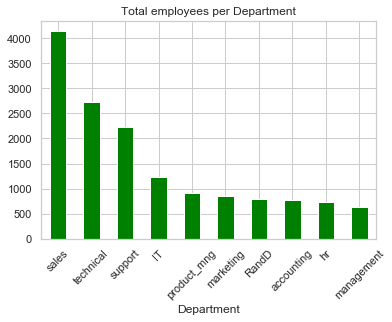

In [36]:
# Plotting a bar chart for the distribution of employees per department
df['sales'].value_counts().plot(kind='bar', title='Total employees per Department', color='green')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Adding labels to x-axis and y-axis
plt.xlabel('Department');


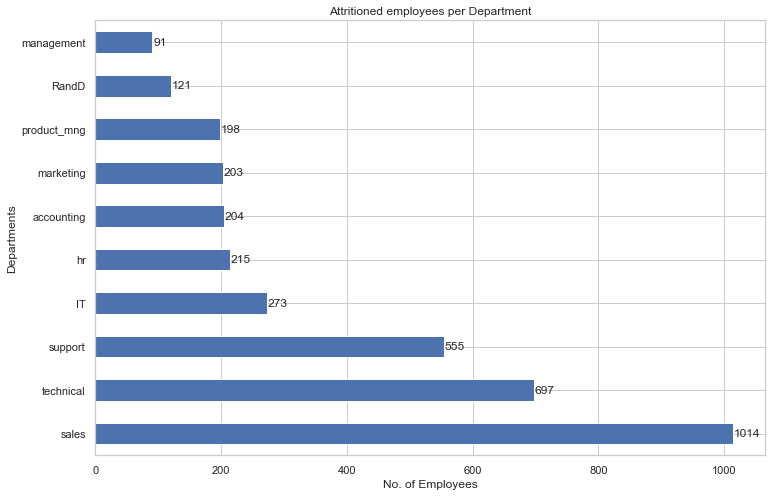

In [37]:
# Counting the number of employees who left ('left==1') in each department
type_counts = df[['sales', 'left']].query('left==1')['sales'].value_counts()

# Total number of employees who left
n_attrition = df[df['left']==1].shape[0]

# Creating a horizontal bar plot for attritioned employees per department
ax = type_counts.plot(kind='barh', figsize=(12, 8), title='Attritioned employees per Department')

# Adding annotations for each bar
for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_str = '{}'.format(count)
    ax.text(count + 1, i, pct_str, va='center')

# Adding labels to x-axis and y-axis
ax.set_xlabel('No. of Employees')
ax.set_ylabel('Departments');

Text(0, 0.5, 'Departments')

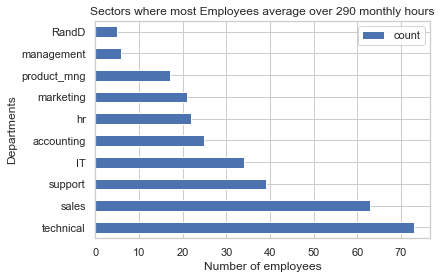

In [38]:
# Filtering employees with average monthly hours greater than or equal to 290
filtered_data = df.query('average_montly_hours >= 290')

# Grouping by department and aggregating the count of employees by salary level
sector_counts = filtered_data.groupby('sales')['salary'].agg(['count'])

# Sorting sectors by the count of employees working long hours
sorted_sectors = sector_counts.sort_values('count', ascending=False)

# Creating a horizontal bar plot to visualize sectors with employees averaging over 290 monthly hours
ax = sorted_sectors.plot(kind='barh', title='Sectors where most Employees average over 290 monthly hours')

# Adding labels to x-axis and y-axis
ax.set_xlabel('Number of employees')
ax.set_ylabel('Departments')


<h2>Question 1 </h2>
Pay distribution for the longest working employees

Text(0, 0.5, 'Count')

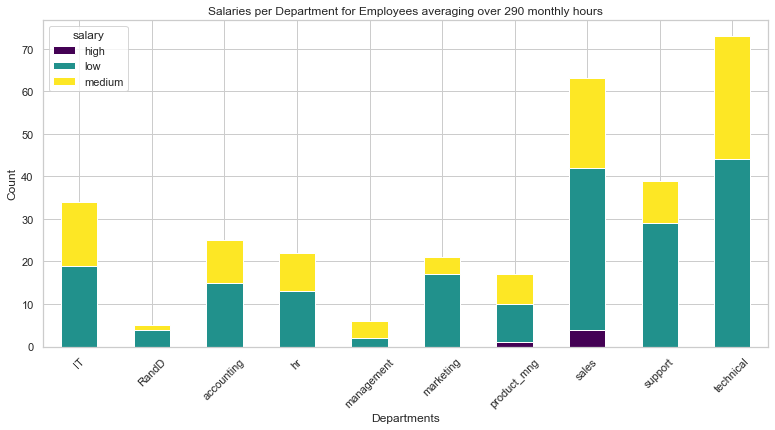

In [39]:
# Filtering employees with average monthly hours greater than or equal to 290
filtered_data = df.query('average_montly_hours >= 290')

# Grouping by department and salary, and aggregating the count of employees
axes = filtered_data.groupby(['sales', 'salary'])['salary'].agg(['count'])

# Creating a pivot table to reshape the data
pivot_df = axes.pivot_table(index='sales', columns='salary', values='count', aggfunc='sum', fill_value=0)

# Creating a stacked bar plot to visualize salaries per department for employees averaging over 290 monthly hours
pivot_df.plot(kind='bar', stacked=True, colormap='viridis', figsize=(13, 6))

# Adding title and labels to the plot
plt.title('Salaries per Department for Employees averaging over 290 monthly hours')
plt.xlabel('Departments')
plt.xticks(rotation=45)
plt.ylabel('Count');


<h2>Question 2 </h2>
Satisfaction levels amongst the hardest working employees.

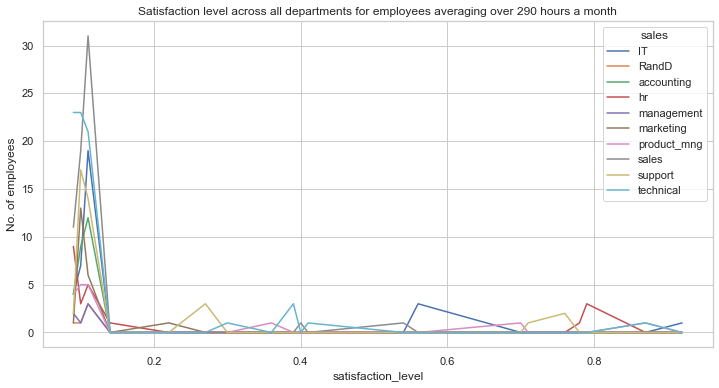

In [40]:
# Filtering employees with average monthly hours greater than or equal to 290
filtered_data = df.query('average_montly_hours >= 290')

# Grouping by department, satisfaction level, and salary, and aggregating the count of employees
ax = filtered_data.groupby(['sales', 'satisfaction_level'])['salary'].agg(['count'])

# Creating a pivot table to reshape the data
pivot_df2 = ax.pivot_table(index='satisfaction_level', columns='sales', values='count', fill_value=0)

# Creating a line plot to visualize satisfaction levels across all departments
pivot_df2.plot(kind='line', figsize=(12, 6))

# Adding title and labels to the plot
plt.title('Satisfaction level across all departments for employees averaging over 290 hours a month')
plt.ylabel('No. of employees');

Sales department shows the lowest levels of satisfaction across all employees averaging over 290 hours a month, while also showing that a majority of sales salaries were classified as low.

<h2> Question 3 </h2>
Employees that should be considered for raises


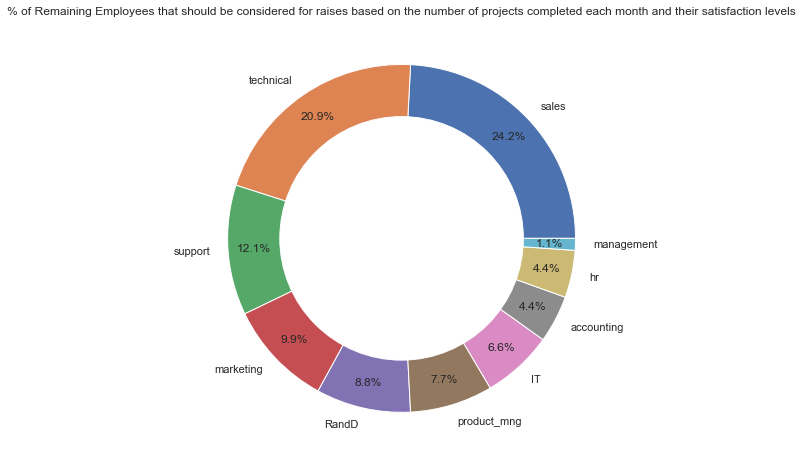

In [16]:
raises = df.query('number_project >=6').groupby(['sales', 'salary', 'satisfaction_level', 'left'])\
.count().query('left == 0').query('satisfaction_level <= 0.5')['number_project']\
.reset_index().query('salary == "low"')['sales'].value_counts().reset_index()\
.rename(columns = {'index': 'Departments'})

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(raises['sales'], labels=raises['Departments'], autopct='%1.1f%%',
      pctdistance =0.85)
center_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.set_title('% of Remaining Employees that should be considered for raises based on the number of projects completed each month \
and their satisfaction levels')
fig.gca().add_artist(center_circle);


<h2> Question 4 </h2>
When were employees who were not attritioned and completed the least projects last evaluated?


Text(0, 0.5, 'Last Evaluation')

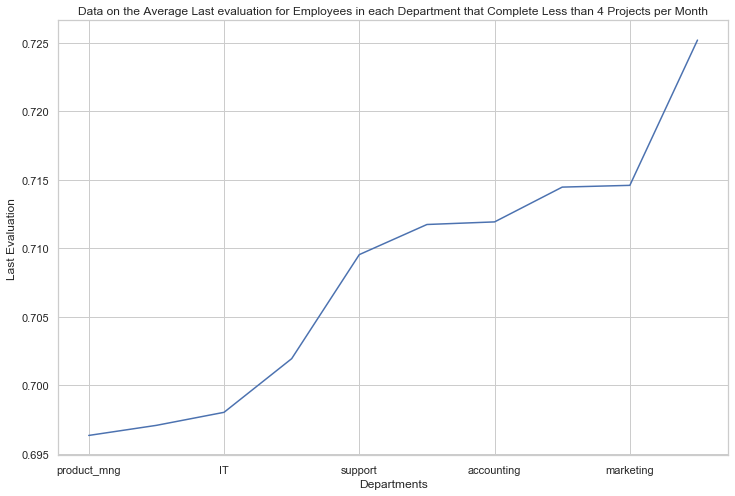

In [41]:
# Filtering employees with less than or equal to 3 projects
filtered_data = df.query('number_project <= 3')

# Grouping by department and left status, aggregating mean last evaluation for employees who didn't leave (left == 0)
mean_last_evaluation = filtered_data.groupby(['sales', 'left']).agg(['mean']).query('left == 0')['last_evaluation']

# Creating a pivot table to focus on mean last evaluation for each department
pivot_table = mean_last_evaluation.pivot_table(index='sales', values='mean').sort_values('mean')['mean']

# Plotting a line chart for the average last evaluation per department for employees completing less than 4 projects
pivot_table.plot(kind='line', figsize=(12, 8), 
                 title='Data on the Average Last evaluation for Employees in each Department that Complete Less than 4 Projects per Month')

# Adding labels to x-axis and y-axis
plt.xlabel('Departments')
plt.ylabel('Last Evaluation');


Sales was highest with 1014 employees attritioned which corresponds to the low salaries and level of satisfaction amongst employees working in those departments

In [18]:
df[['sales', 'left']].query('left==1')['sales'].value_counts()

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: sales, dtype: int64

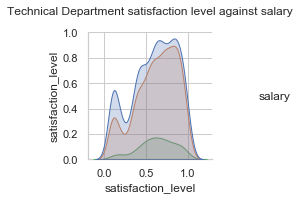

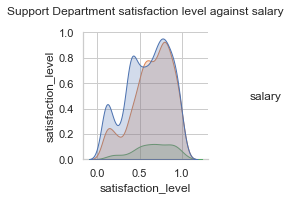

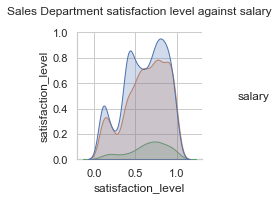

In [19]:
sectors = ['technical', 'support', 'sales']

for x in sectors:
    sb.pairplot(data=df[df['sales']== x], vars=['satisfaction_level'],
               hue='salary')
    plt.title(f'{x.title()} Department satisfaction level against salary\n')

    

How long have the employees in each department stayed at the company.
* Also what is the time relationship between for employees who work the longest? 
* Do the have a short time at the company which may signify overzealous efforts that may not be sustainable?

Text(0, 0.5, 'Average number of years')

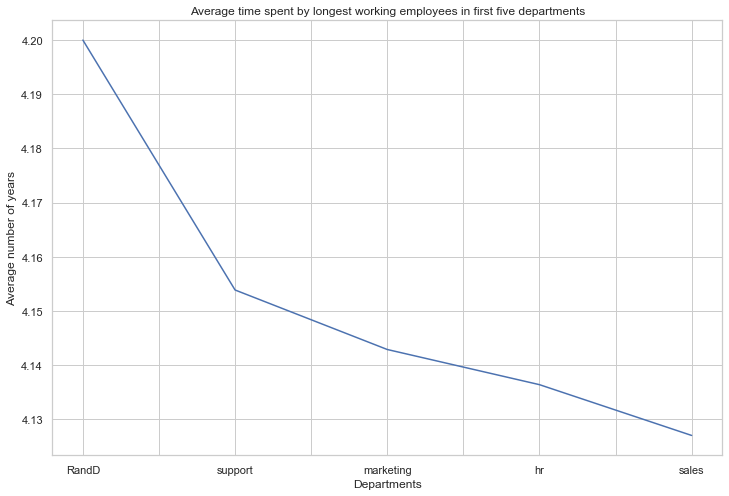

In [42]:
# Filtering employees with average monthly hours greater than or equal to 290
filtered_data = df.query('average_montly_hours >= 290')

# Grouping by department, aggregating count and mean of time spent in the company
result = filtered_data.groupby('sales').agg(['count', 'mean'])['time_spend_company']

# Sorting departments by the mean time spent and selecting the top 5
top_departments = result.sort_values('mean', ascending=False)['mean'].head()

# Plotting a line chart for the average time spent by longest working employees in the first five departments
top_departments.plot(kind='line', title='Average time spent by longest working employees in first five departments', figsize=(12, 8))

# Adding labels to x-axis and y-axis
plt.xlabel('Departments')
plt.ylabel('Average number of years');


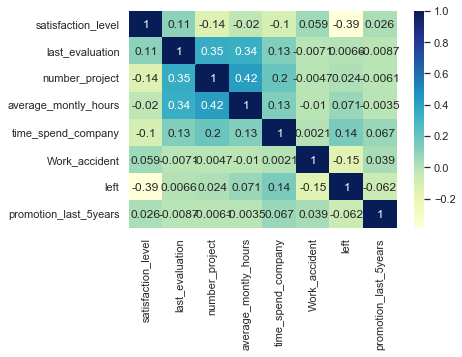

In [21]:
df_corr = df.corr()

sb.heatmap(df_corr, annot=True, cmap="YlGnBu");

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [45]:
df = df.drop(['sales', 'salary'], axis=1)

In [46]:
# Splitting the data into training and testing sets
X = df.drop('left', axis=1)
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   stratify = y, random_state = 42)

# Initializing machine learning models
le = LinearRegression()
lg = LogisticRegression()
tree_c, tree_r = DecisionTreeClassifier(), DecisionTreeRegressor()

# Creating a list of models and corresponding labels
models = [le, lg, tree_c, tree_r]
labels = ['Linear Regression', 'Logistic Regression',
         'Decision Tree Classifier', 'Decision Tree Regressor']

# Looping through models for training and evaluation
for model, label in zip(models, labels):
    # Training the model
    model.fit(X_train, y_train)
    
    # Evaluating the model on the test set
    score = model.score(X_test, y_test)
    
    print(f'Accuracy of the {label} model: {round(score * 100, 2)}%')


Accuracy of the Linear Regression model: 18.92%
Accuracy of the Logistic Regression model: 76.42%
Accuracy of the Decision Tree Classifier model: 97.82%
Accuracy of the Decision Tree Regressor model: 88.11%


W:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [47]:
# Initializing the K Nearest Neighbors Classifier with 7 neighbors
knn = KNeighborsClassifier(n_neighbors=7)

# Training the KNN model on the training set
knn.fit(X_train, y_train)

# Evaluating the accuracy of the KNN model on the test set
K_score = knn.score(X_test, y_test)

# Displaying the accuracy of the KNN model
print(f'Accuracy of the K Nearest Neighbors Classifier Model: {round(K_score * 100, 2)}%')


Accuracy of the K Nearest Neighbors Classifier Model: 95.07%


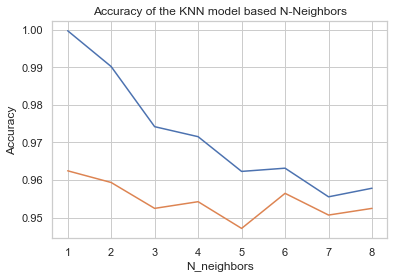

In [48]:
neighbors = np.arange(1, 9)
testing_accuracy = np.empty(len(neighbors))
training_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors = k)
    
    knn.fit(X_train, y_train)
    
    training_accuracy[i] = knn.score(X_train, y_train)
    
    testing_accuracy[i] = knn.score(X_test, y_test)
    
plt.title("Accuracy of the KNN model based N-Neighbors")
plt.plot(neighbors, training_accuracy, label = 'Training Accuracy')
plt.plot(neighbors, testing_accuracy, label = 'Testing Accuracy')
plt.xlabel('N_neighbors')
plt.ylabel('Accuracy')
plt.show()